In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from classes.RaekkehusData import getRaekkehusData, getRaekkehusDataRaw, trainModel, testModel, saveModel, loadModel

In [2]:
data = getRaekkehusData()
data.describe()

Cleaning data


,Adresse,Year build,Pris,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Etager,Seneste ombygning,Varmeinstallation,Grundstørrelse
count,987.000000,987.000000,9.870000e+02,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,5402.048632,1977.867275,2.476998e+06,6.475177,2641.077001,110.340426,3.987842,1.474164,1.197568,4.655522,4.398176,1.317123,1982.678825,2.518744,265.152989
std,2465.281775,28.977182,1.163421e+06,2.007123,959.901110,22.240243,0.856815,0.519490,0.413360,1.177406,2.866983,0.493097,25.311952,0.922121,142.203444
min,2300.000000,1901.000000,9.900000e+04,0.000000,691.000000,41.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1902.000000,0.000000,0.000000
25%,2970.000000,1964.500000,1.596500e+06,6.000000,1920.000000,95.000000,3.000000,1.000000,1.000000,5.000000,2.000000,1.000000,1970.000000,2.000000,163.000000
50%,4700.000000,1978.000000,2.395000e+06,7.000000,2501.000000,110.000000,4.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1981.000000,3.000000,231.000000
75%,8240.000000,2004.000000,3.195000e+06,8.000000,3326.000000,126.000000,4.000000,2.000000,1.000000,5.000000,7.000000,2.000000,2006.000000,3.000000,354.000000
max,9900.000000,2019.000000,5.998000e+06,11.000000,8196.000000,176.000000,6.000000,3.000000,3.000000,6.000000,8.000000,3.000000,2019.000000,5.000000,689.000000


### Features

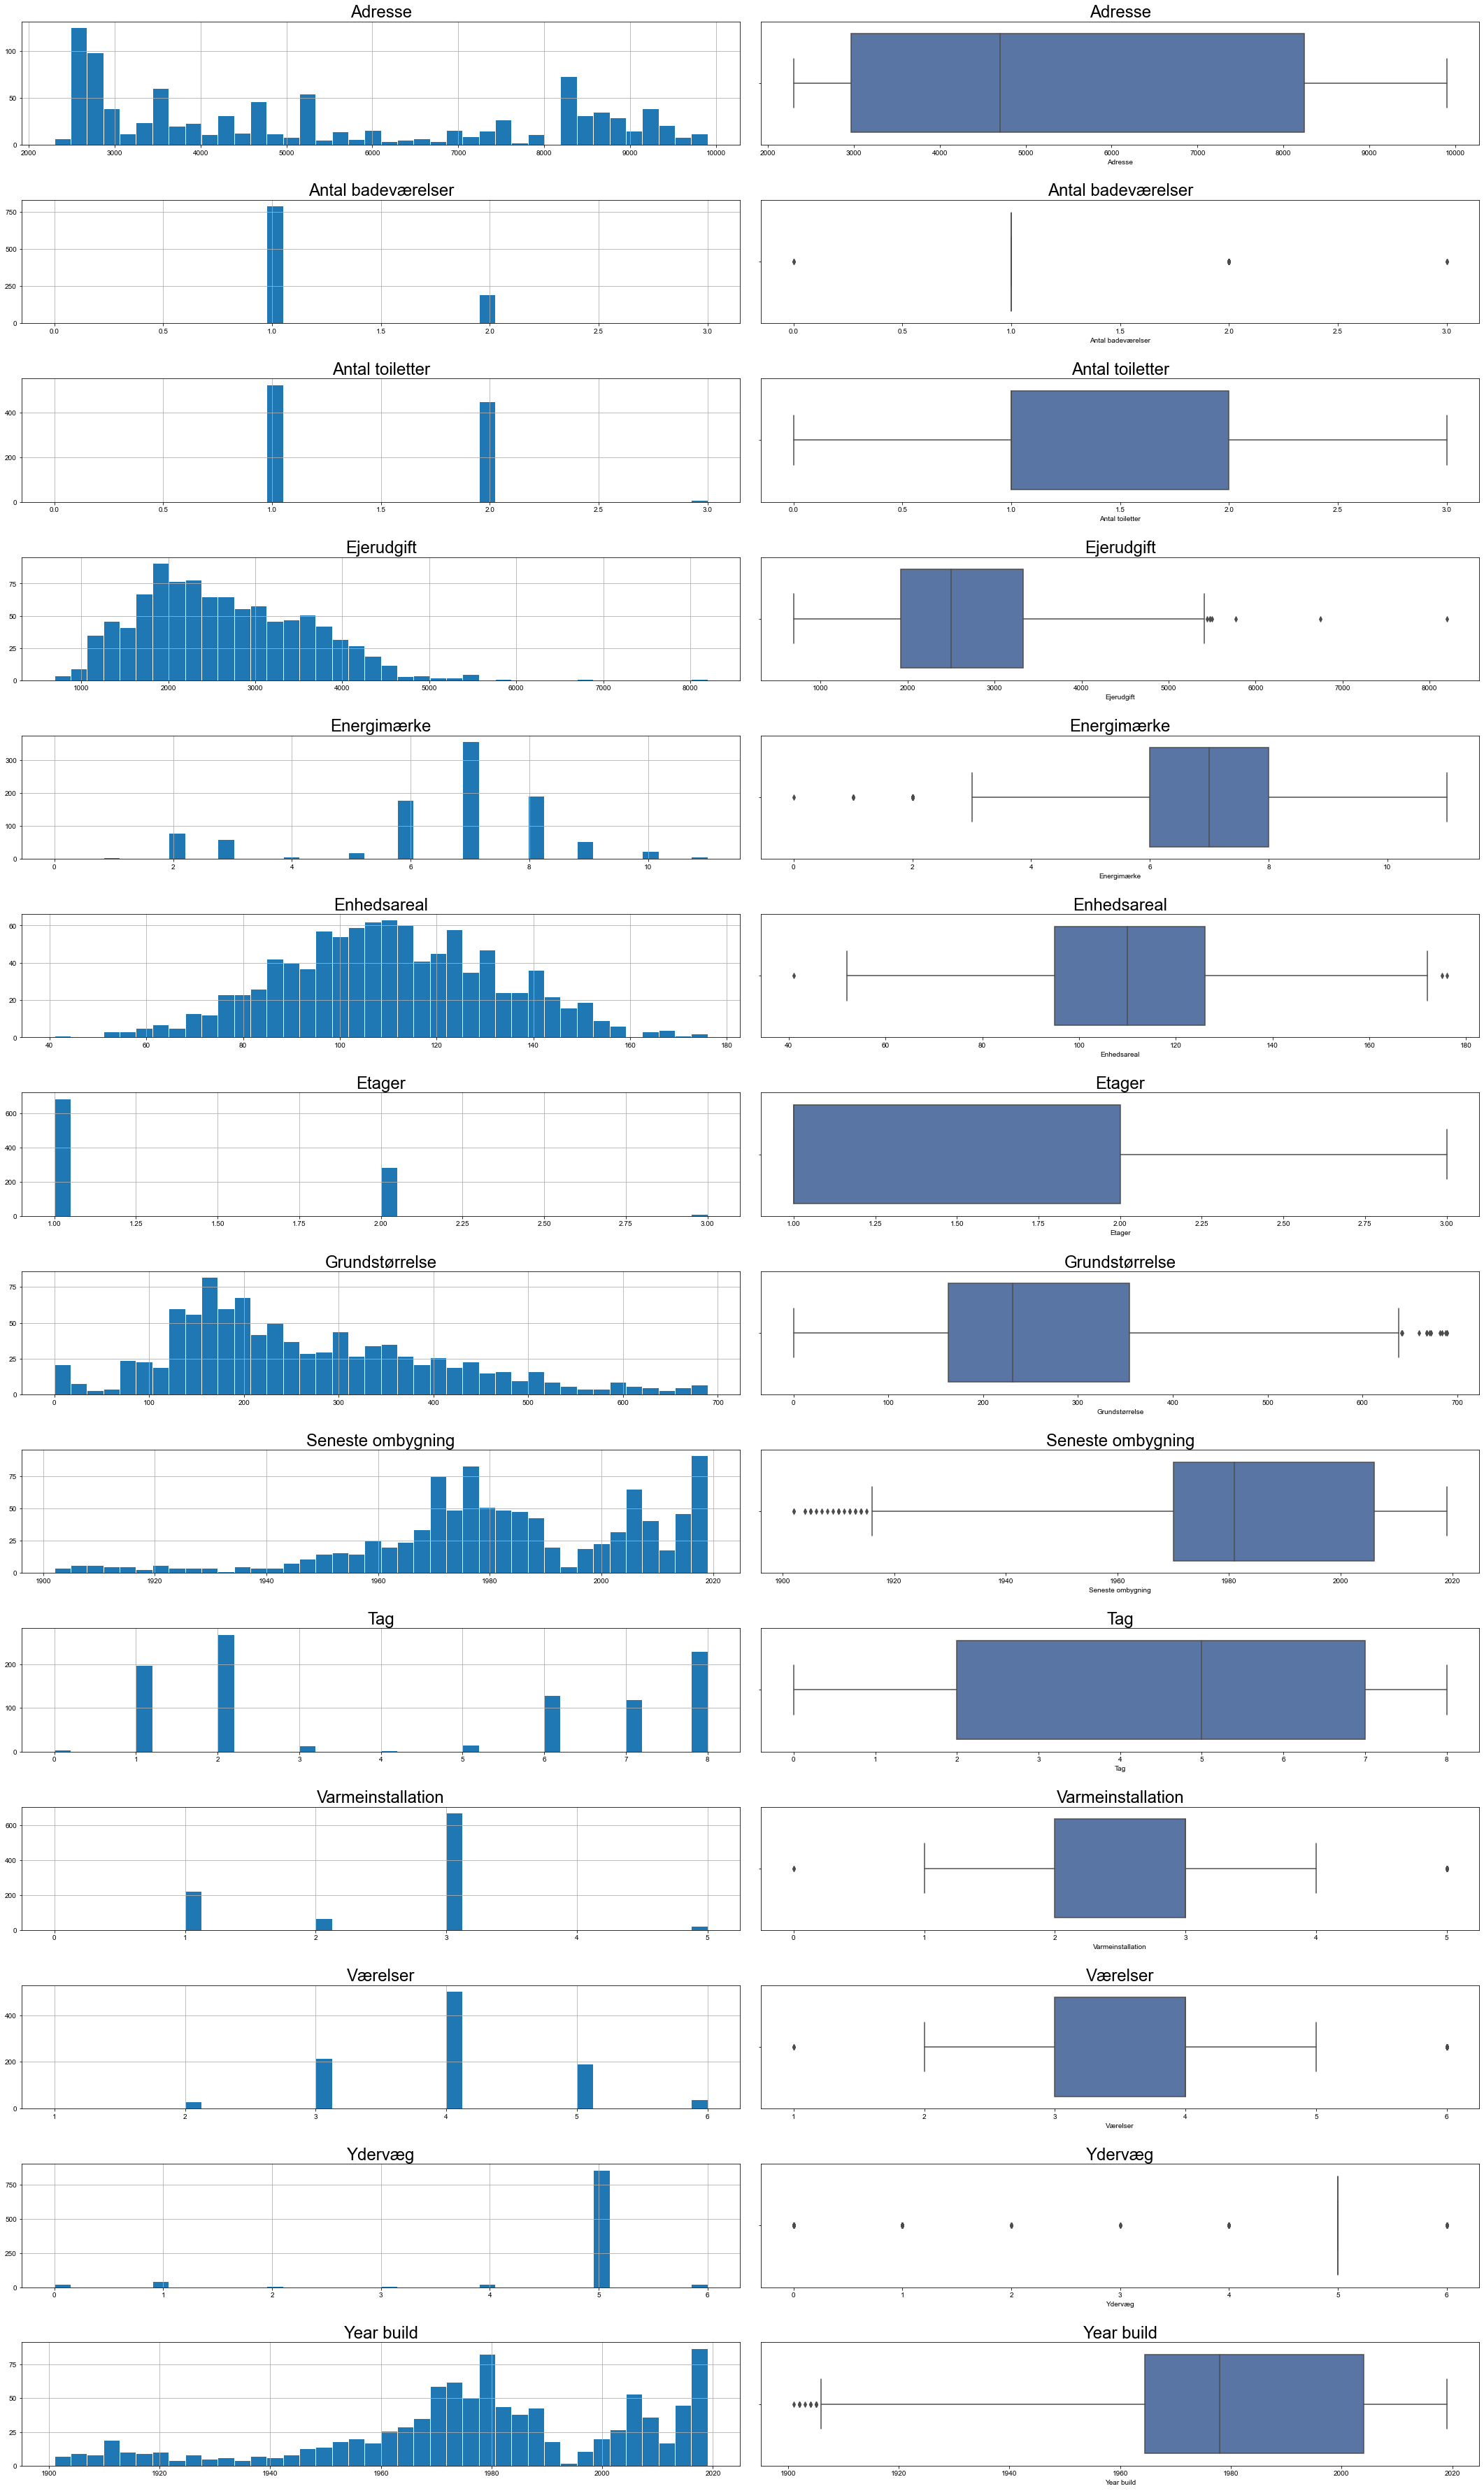

In [3]:
columns = np.setdiff1d(data.columns.to_numpy(),'Pris')
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(30,50))
sb.set(font_scale=2)

for col in enumerate(columns):
    data[col[1]].hist(ax=axes[col[0],0], bins=40);
    axes[col[0],0].set_title(col[1])
    sb.boxplot(ax=axes[col[0],1], x=data[col[1]])
    axes[col[0],1].set_title(col[1])

plt.tight_layout()

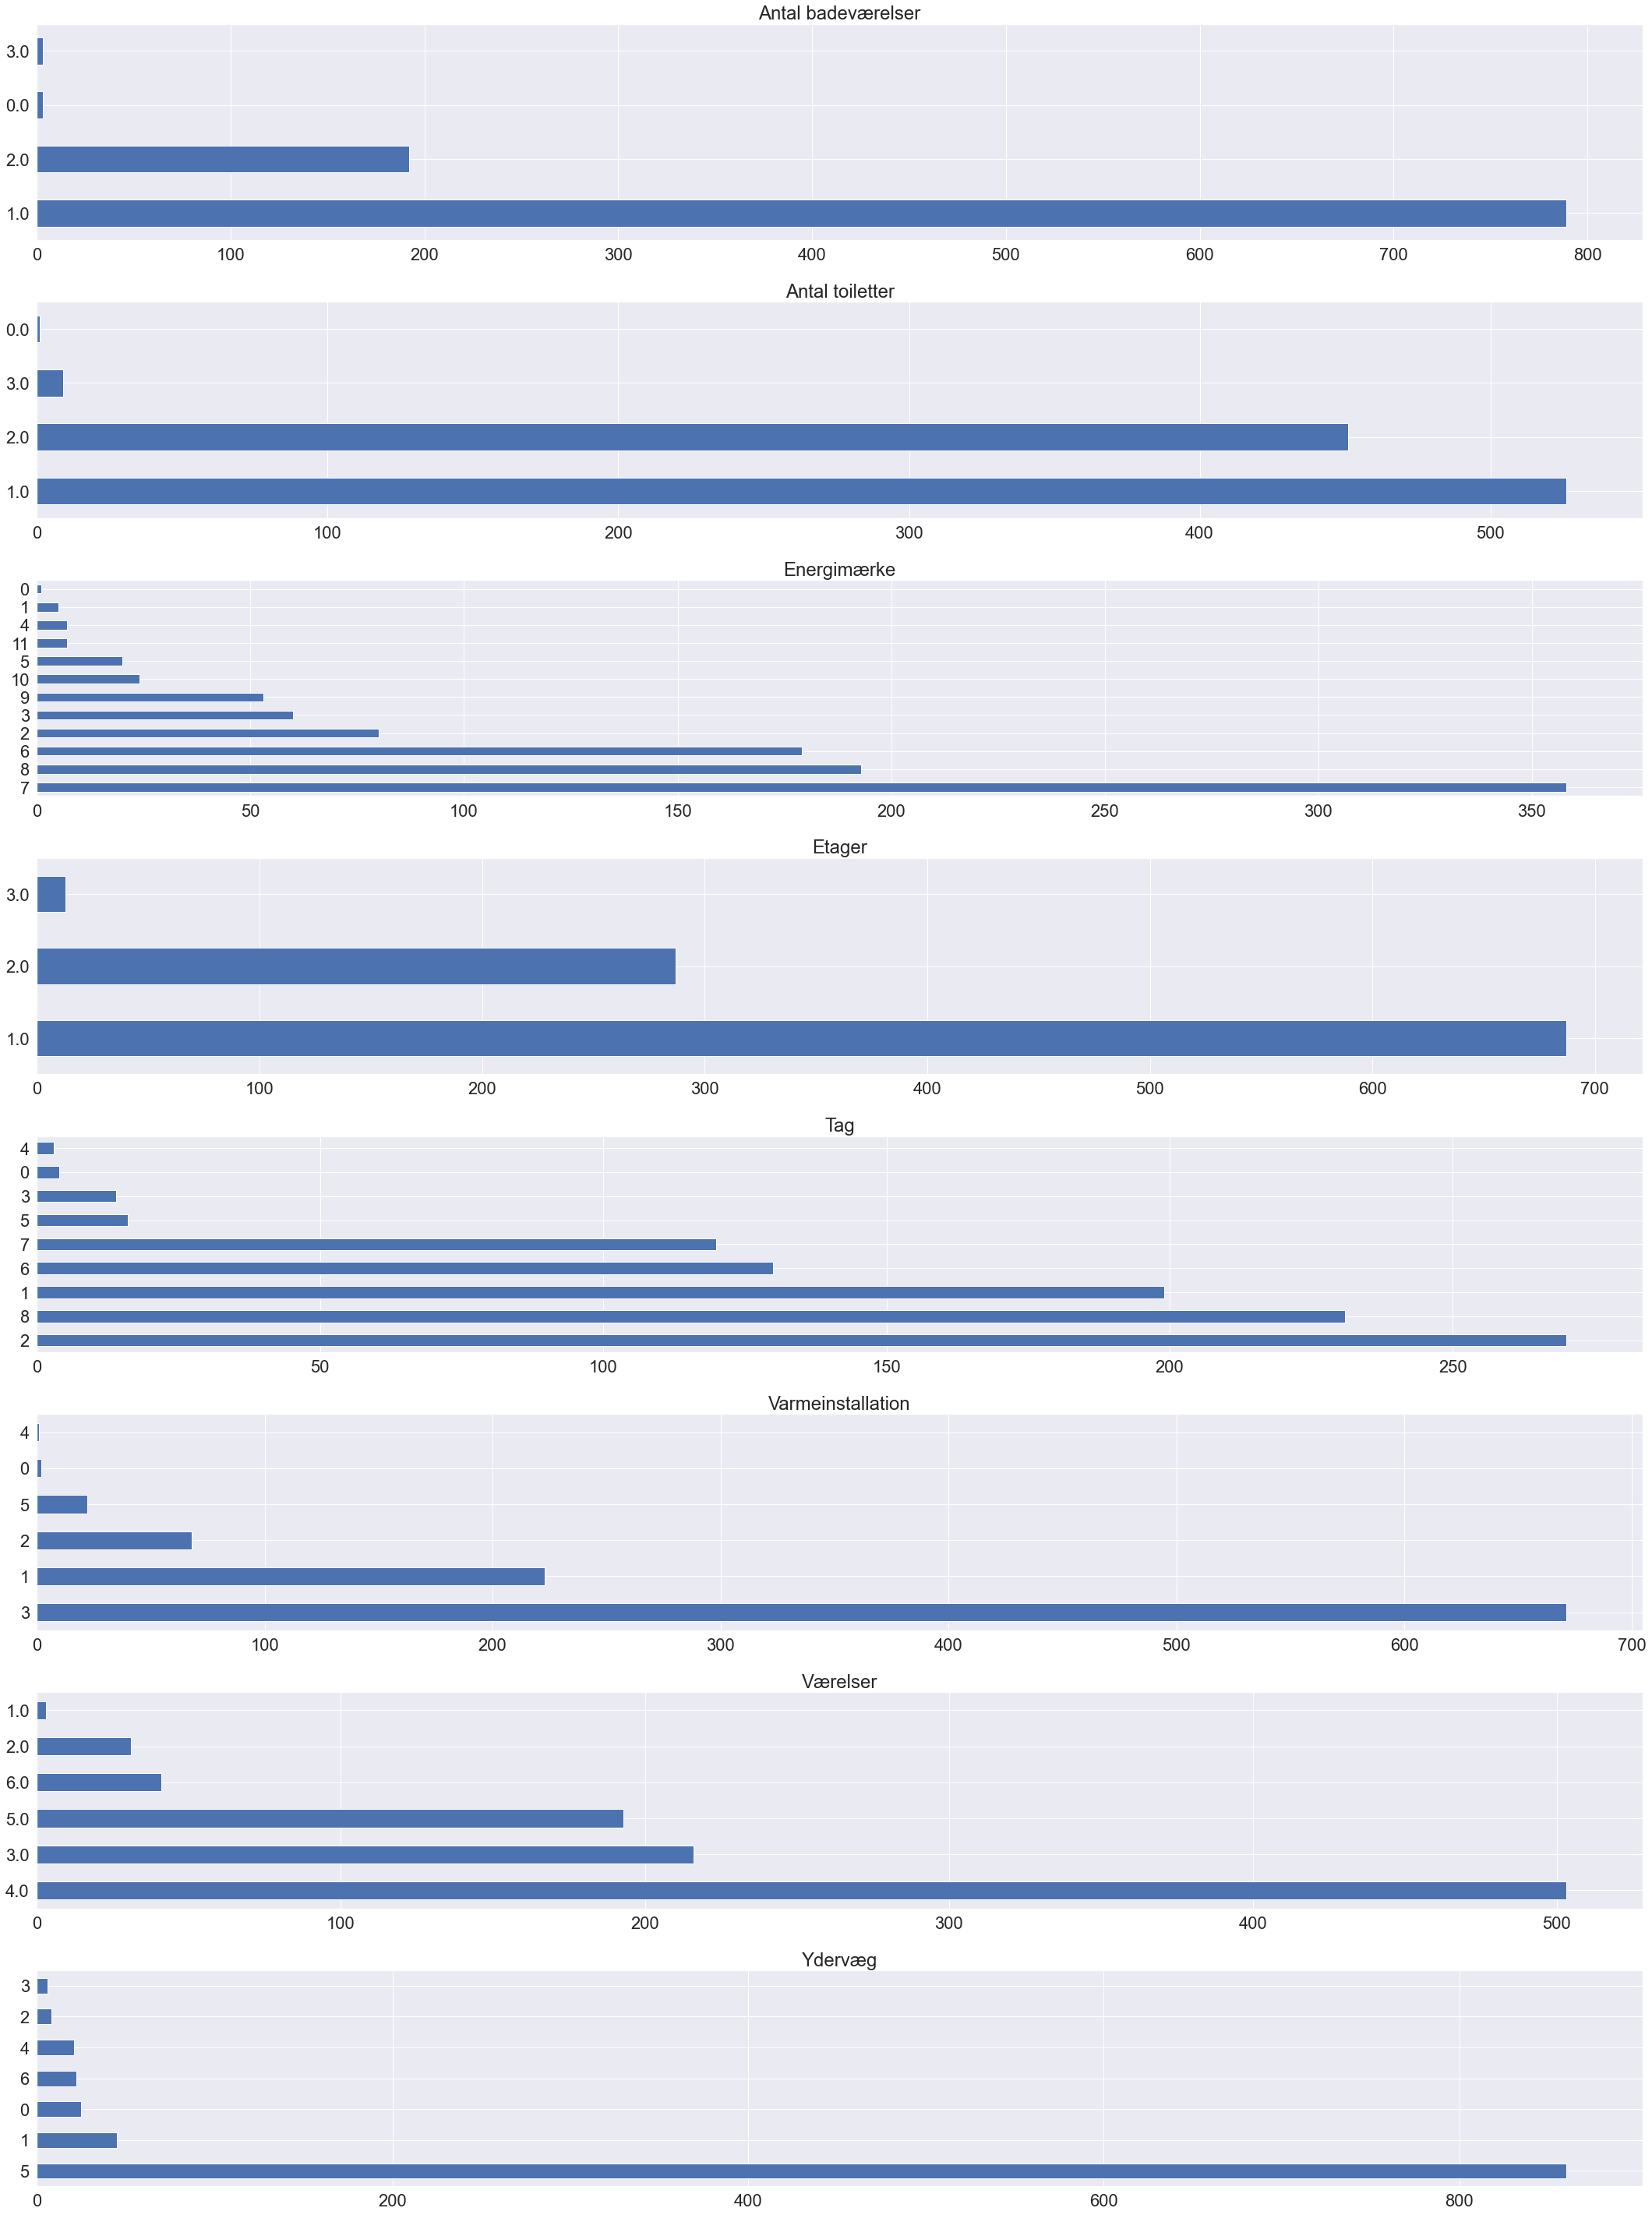

In [4]:
columns = ['Antal badeværelser', 'Antal toiletter', 'Energimærke', 'Etager', 'Tag', 'Varmeinstallation', 'Værelser', 'Ydervæg']
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(30,40))
sb.set(font_scale=2)

for col in enumerate(columns):
    pd.value_counts(data[col[1]]).plot(kind='barh',ax=axes[col[0]])
    axes[col[0]].set_title(col[1]);
    
plt.tight_layout()

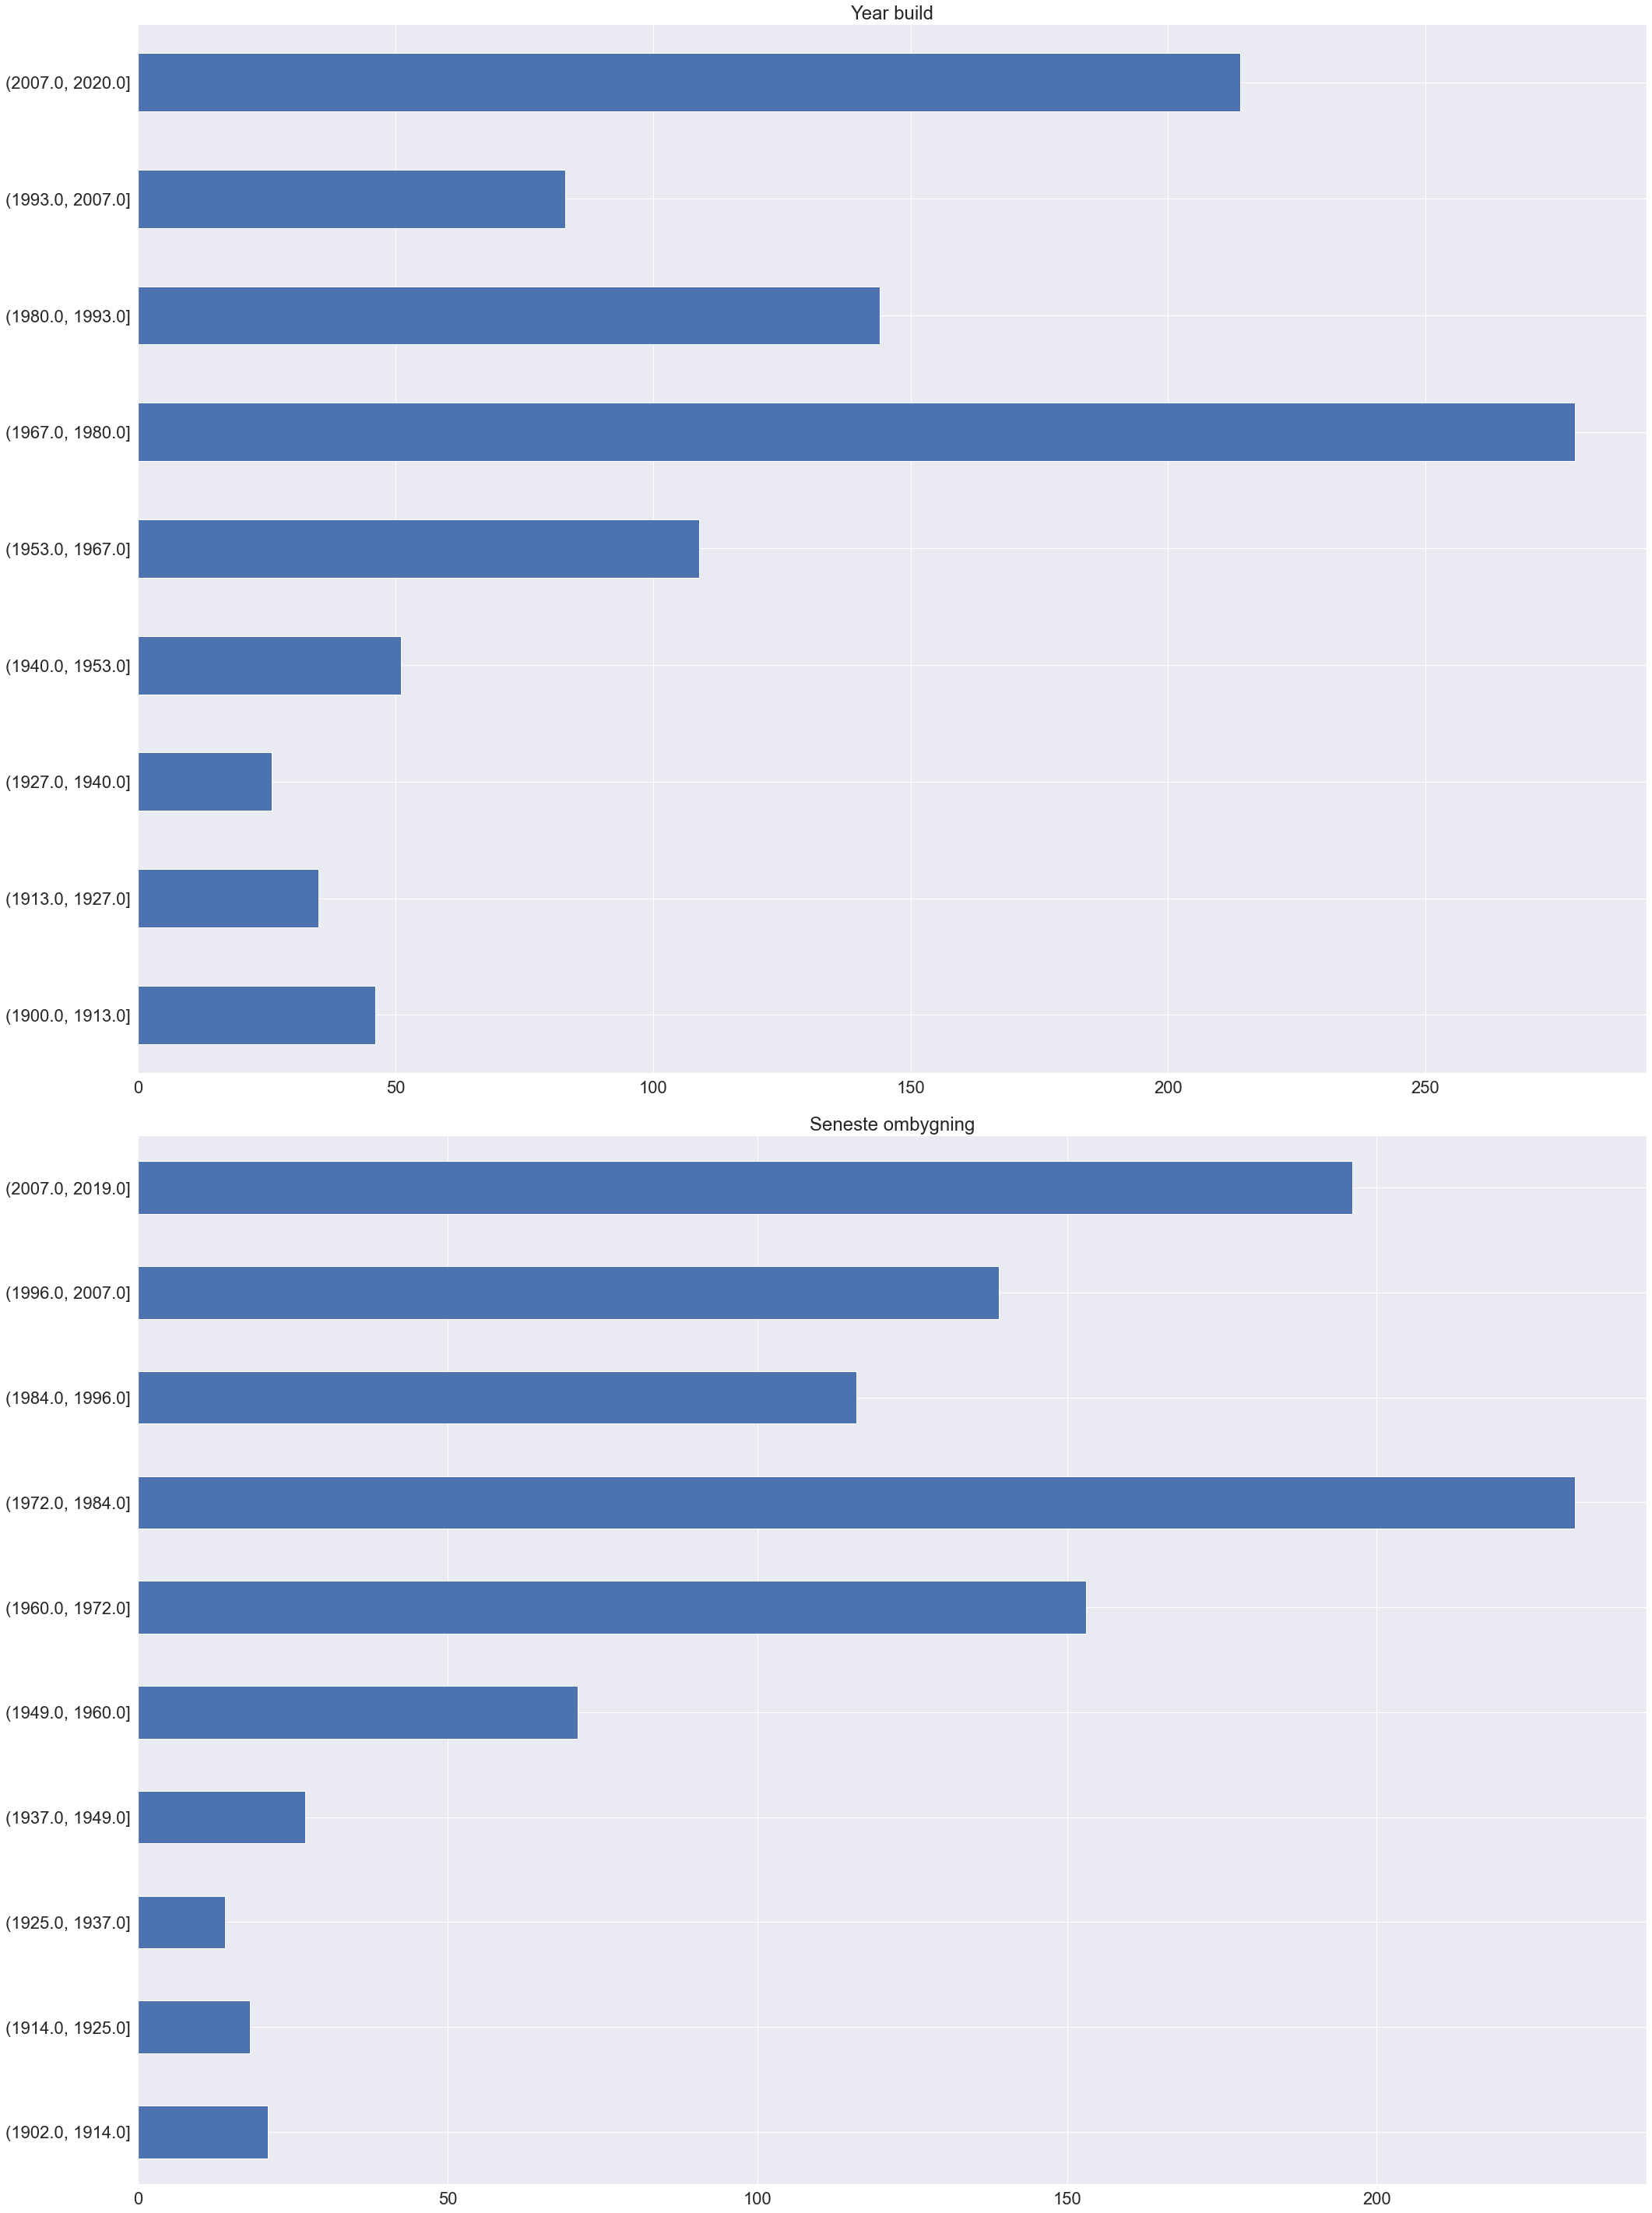

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,40))
sb.set(font_scale=2)

bins = np.linspace(1900, 2020, 10)
pd.value_counts(pd.cut(data['Year build'], bins=bins, precision=0), sort=False).plot(kind='barh',ax=axes[0])
axes[0].set_title('Year build');

bins = np.linspace(1900, 2020, 10)
pd.value_counts(pd.cut(data['Seneste ombygning'], 10, precision=0), sort=False).plot(kind='barh',ax=axes[1])
axes[1].set_title('Seneste ombygning');


plt.tight_layout()

### Target

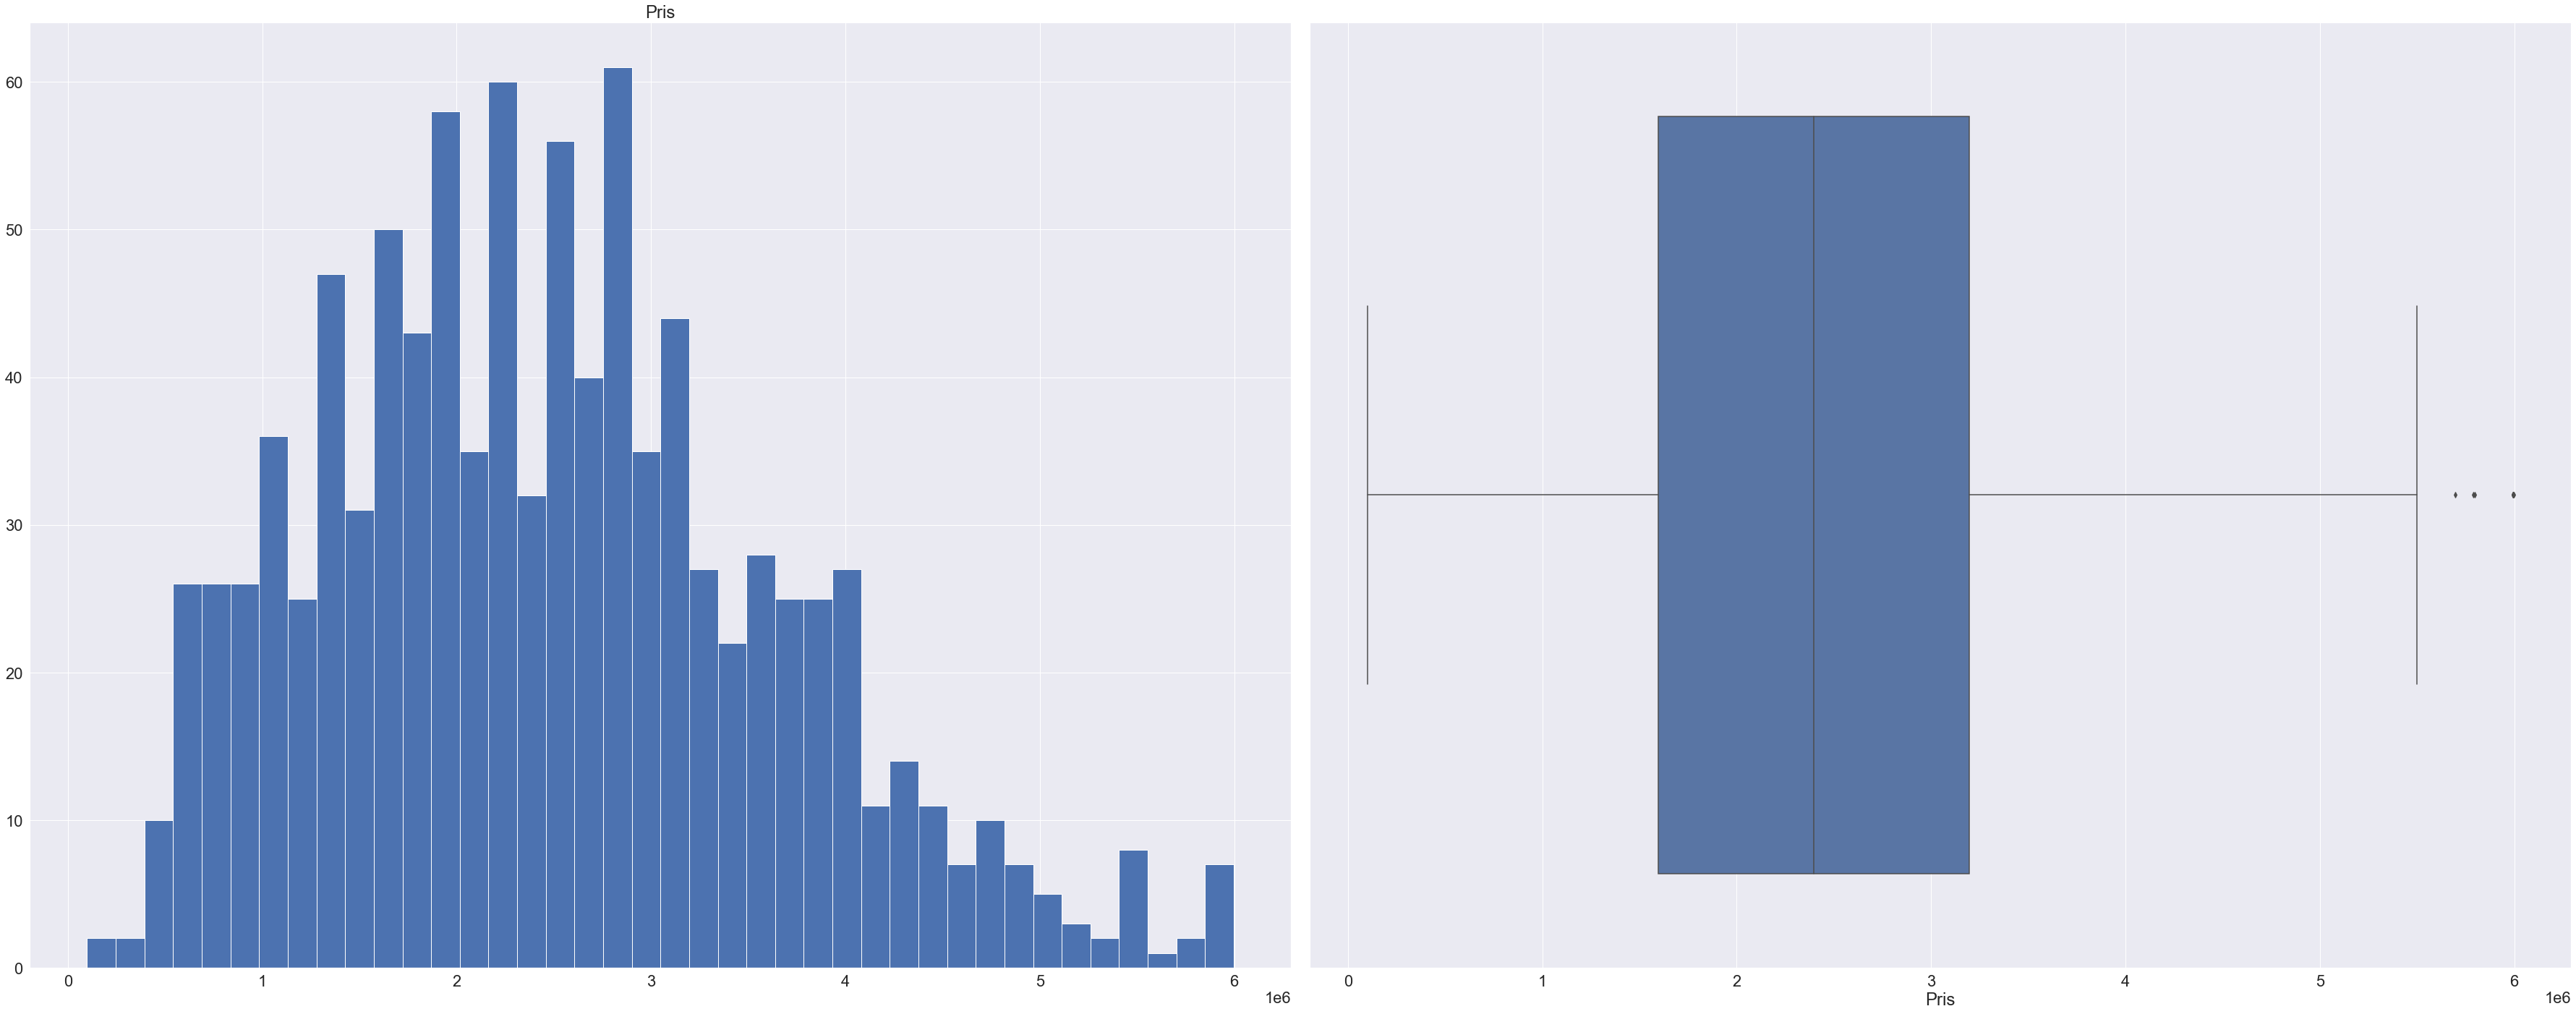

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50,20))
sb.set(font_scale=2)

data['Pris'].hist(ax=axes[0], bins=40);
axes[0].set_title('Pris')
sb.boxplot(ax=axes[1], x=data['Pris'])

plt.tight_layout()

### Model

In [7]:
trainModel()

Data was already cleaned
Model trained


In [8]:
testModel()

0.7257399681773127

In [9]:
X_test, y_test = saveModel()

Model saved!


In [10]:
model = loadModel('./data/raekkehus_model.pickle')
model.score(X_test, y_test)

0.7257399681773127